In [8]:
%pylab inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.font_manager import FontProperties
import collections
import seaborn as sns
mycolors = [
    '#e41a1c',
    '#377eb8',
    '#4daf4a',
    '#984ea3',
    '#d3d3d3']

Populating the interactive namespace from numpy and matplotlib


/home/cmb-panasas2/wenzhenl/downloads/miniconda/envs/ribo/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
# ribotaper_cutoff = args[1]
ribotaper_cutoff = 0.05
# default 6.044
# ORFscore_cutoff = args[2]
ORFscore_cutoff = 6.044
# default 0.05
# ribocode_cutoff = args[3]
ribocode_cutoff = 0.05
#default 0.428571428571
# ribocop_cutoff = as.double(args[1])
ribocop_cutoff = 0.428571428571

('SRP010679_human', 'hg38')
('SRP029589_human', 'hg38')
('SRP063852_human', 'hg38')
('SRP098789_human', 'hg38')
('SRP102021_human', 'hg38')
('SRP003554_mouse', 'mm10')
('SRP062407_mouse', 'mm10')
('SRP078005_mouse', 'mm10')
('SRP091889_mouse', 'mm10')
('SRP115915_mouse', 'mm10')


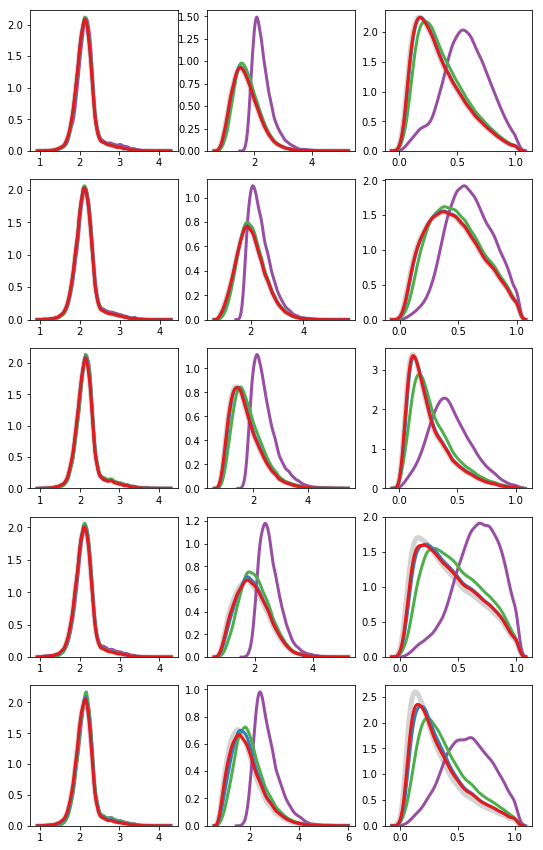

In [14]:
fig, axes = plt.subplots(5,3, sharex=False, sharey=False)
fig.set_size_inches(9, 15)
datasets = pd.read_table('/home/cmb-panasas2/wenzhenl/benchmark/scripts/gene_scripts/datasets.txt', header=None, sep=' ')
for i, row in datasets.iterrows():
    pro, ref = row
    print(pro, ref)
    if ref != 'mm10':
        continue
    i = i-5
    df = pd.read_csv('/home/cmb-panasas2/wenzhenl/benchmark/exon_level/{}/{}/ROC_input.txt'.format(ref, pro), sep='\t', index_col='name')
    df = df[df['truth'] == 1]
    df.index = df.index.str.replace('_ribo', '')
    df = df[['ribotaper', 'ORFscore', 'ribocode', 'ribocop']]
    result_ccds = pd.read_csv('/home/cmb-panasas2/wenzhenl/benchmark/exon_level/{}/{}/results_ccds'.format(ref, pro), sep='\t', index_col='exon_id')
    result_ccds = result_ccds[['length.x', 'reads_ribo']]
    code_df = pd.read_csv('/home/cmb-panasas2/wenzhenl/benchmark/exon_level/{}/{}/ribocode_result.txt'.format(ref, pro), sep='\t', index_col='ID')
    code_df = code_df[['ribo_cov']]
    merged = df.merge(result_ccds, left_index=True, right_index=True)
    merged = merged.merge(code_df, left_index=True, right_index=True)
    for j, totest in enumerate(['length.x', 'reads_ribo', 'ribo_cov']):
        if totest == 'ribo_cov':
            sns.distplot((merged[totest].values), kde=True, hist=False, ax=axes[i][j], color=mycolors[4], kde_kws={'linewidth': 5})
            sns.distplot((merged[merged['ORFscore'] > ORFscore_cutoff][totest].values), kde=True, hist=False, ax=axes[i][j], color=mycolors[3], kde_kws={'linewidth': 3})
            sns.distplot((merged[merged['ribotaper'] < 0.05][totest].values), kde=True, hist=False, ax=axes[i][j], color=mycolors[2], kde_kws={'linewidth': 3})
            sns.distplot((merged[merged['ribocode'] < 0.05][totest].values), kde=True, hist=False, ax=axes[i][j], color=mycolors[1], kde_kws={'linewidth': 3})
            sns.distplot((merged[merged['ribocop'] > ribocop_cutoff][totest].values), kde=True, hist=False, ax=axes[i][j], color=mycolors[0], kde_kws={'linewidth': 3})
        else:
            sns.distplot(np.log10(merged[totest].values), kde=True, hist=False, ax=axes[i][j], color=mycolors[4], kde_kws={'linewidth': 5})
            sns.distplot(np.log10(merged[merged['ORFscore'] > ORFscore_cutoff][totest].values), kde=True, hist=False, ax=axes[i][j], color=mycolors[3], kde_kws={'linewidth': 3})
            sns.distplot(np.log10(merged[merged['ribotaper'] < 0.05][totest].values), kde=True, hist=False, ax=axes[i][j], color=mycolors[2], kde_kws={'linewidth': 3})
            sns.distplot(np.log10(merged[merged['ribocode'] < 0.05][totest].values), kde=True, hist=False, ax=axes[i][j], color=mycolors[1], kde_kws={'linewidth': 3})
            sns.distplot(np.log10(merged[merged['ribocop'] > ribocop_cutoff][totest].values), kde=True, hist=False, ax=axes[i][j], color=mycolors[0], kde_kws={'linewidth': 3})
fig.savefig('results/mm10_nonbiased_dist.pdf')
                          

In [ ]:
fig, axes = plt.subplots(5,3, sharex=True, sharey=True)
fig.set_size_inches(9, 15)
for i in range(5):
    for j in range(3):
        sns.distplot(np.random.rand(100), kde=True, hist=False, ax=axes[i][j], kde_kws={'linewidth': 3})
        sns.distplot(np.random.rand(100), kde=True, hist=False, ax=axes[i][j], kde_kws={'linewidth': 3})
        sns.distplot(np.random.rand(100), kde=True, hist=False, ax=axes[i][j], kde_kws={'linewidth': 3})
fig.savefig('results/practise.pdf')

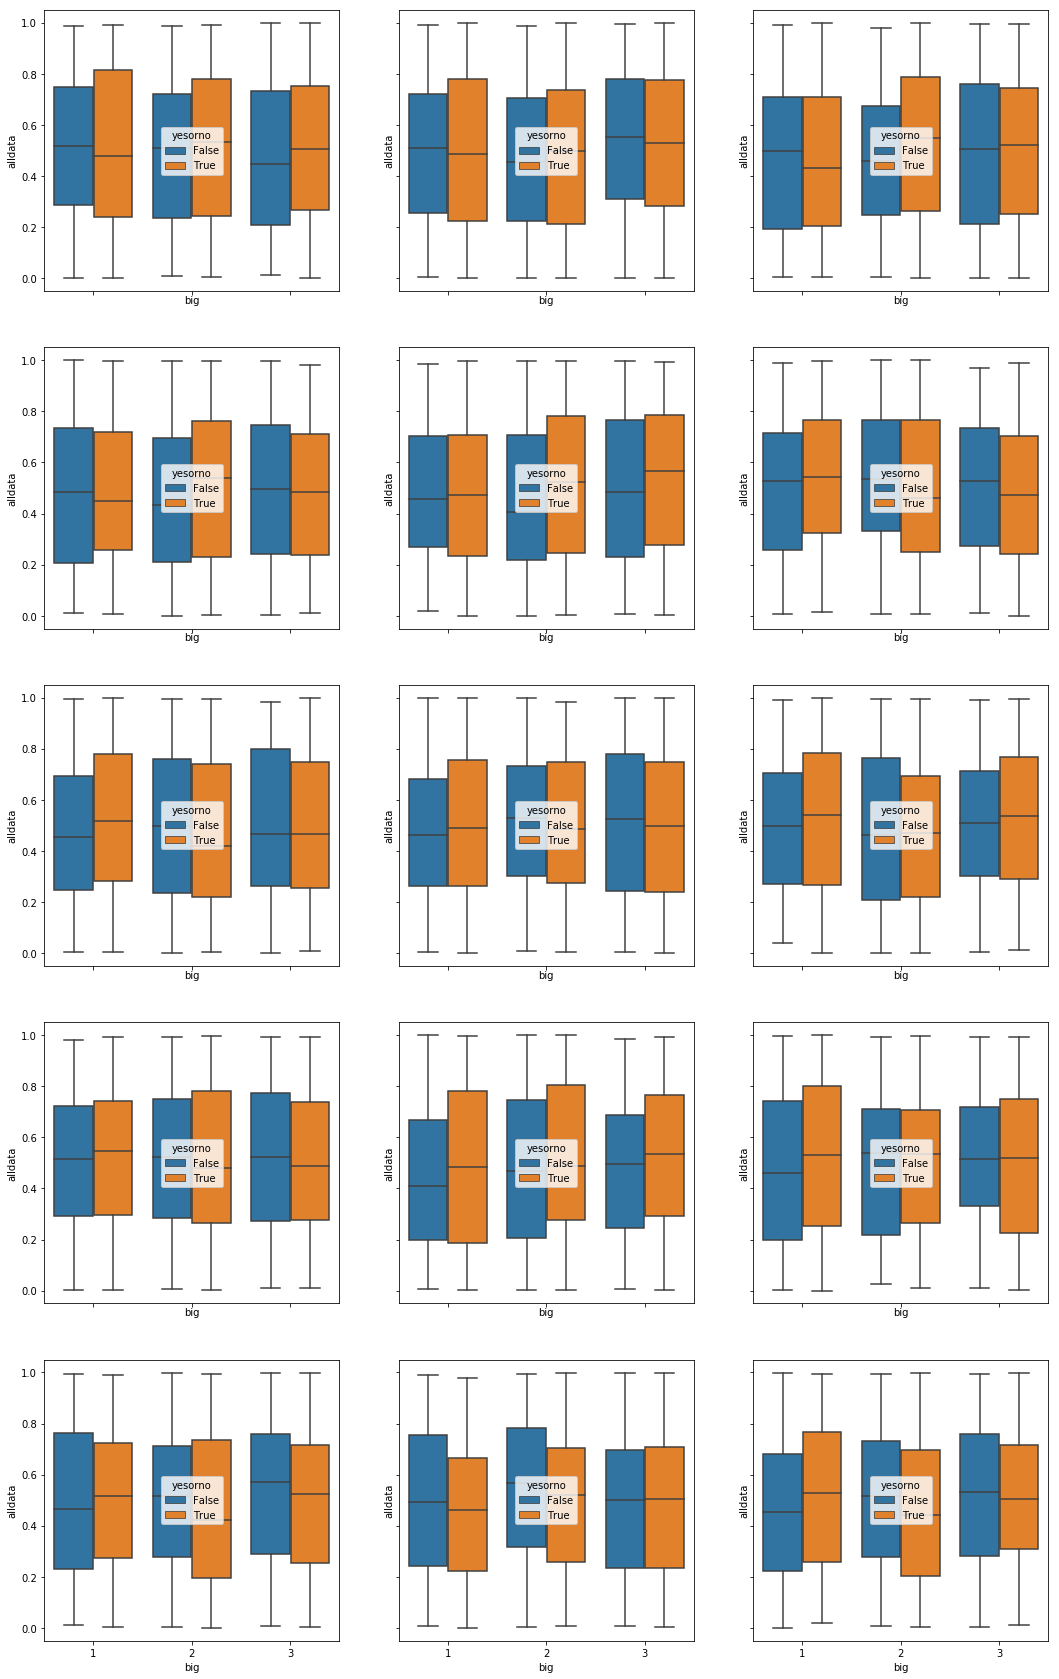

In [36]:
fig, axes = plt.subplots(5,3, sharex=True, sharey=True)
fig.set_size_inches(18, 30)
for i in range(5):
    for j in range(3):
#         simulated = pd.DataFrame(np.random.randint(0, high=100, size=(100, 3)), columns=['A', 'B', 'C'])
#         simulated = pd.DataFrame({'less': np.random.rand(100), 'mid': np.random.rand(100), 'high': np.random.rand(100),
#                                  'cat': np.random.randint(0, 1, 100)})
        simulated = pd.DataFrame({'alldata': np.random.rand(1000), 
                                 'yesorno': np.random.choice([True, False], 1000), 
                                 'big': np.random.choice([1,2,3], 1000)})
        sns.boxplot(x='big', y='alldata', hue='yesorno', data=simulated, ax=axes[i][j])
fig.savefig('results/practise_bar.pdf')

('SRP010679_human', 'hg38')
('SRP029589_human', 'hg38')
('SRP063852_human', 'hg38')
('SRP098789_human', 'hg38')


/panfs/cmb-panasas2/wenzhenl/downloads/miniconda/envs/ribo/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


('SRP102021_human', 'hg38')
('SRP003554_mouse', 'mm10')
('SRP062407_mouse', 'mm10')
('SRP078005_mouse', 'mm10')
('SRP091889_mouse', 'mm10')
('SRP115915_mouse', 'mm10')


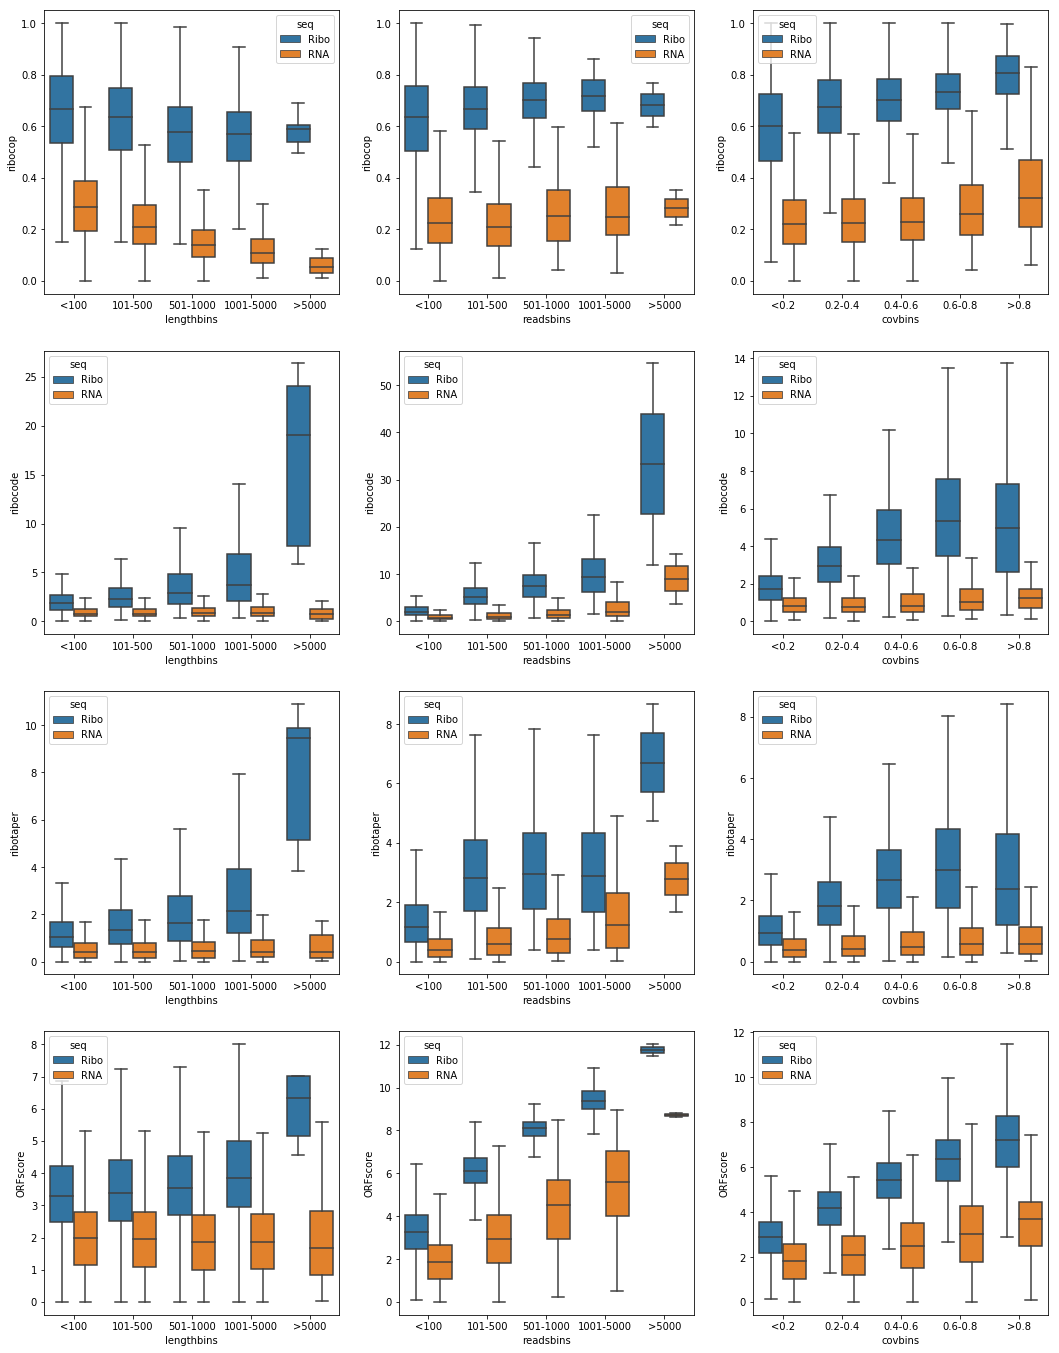

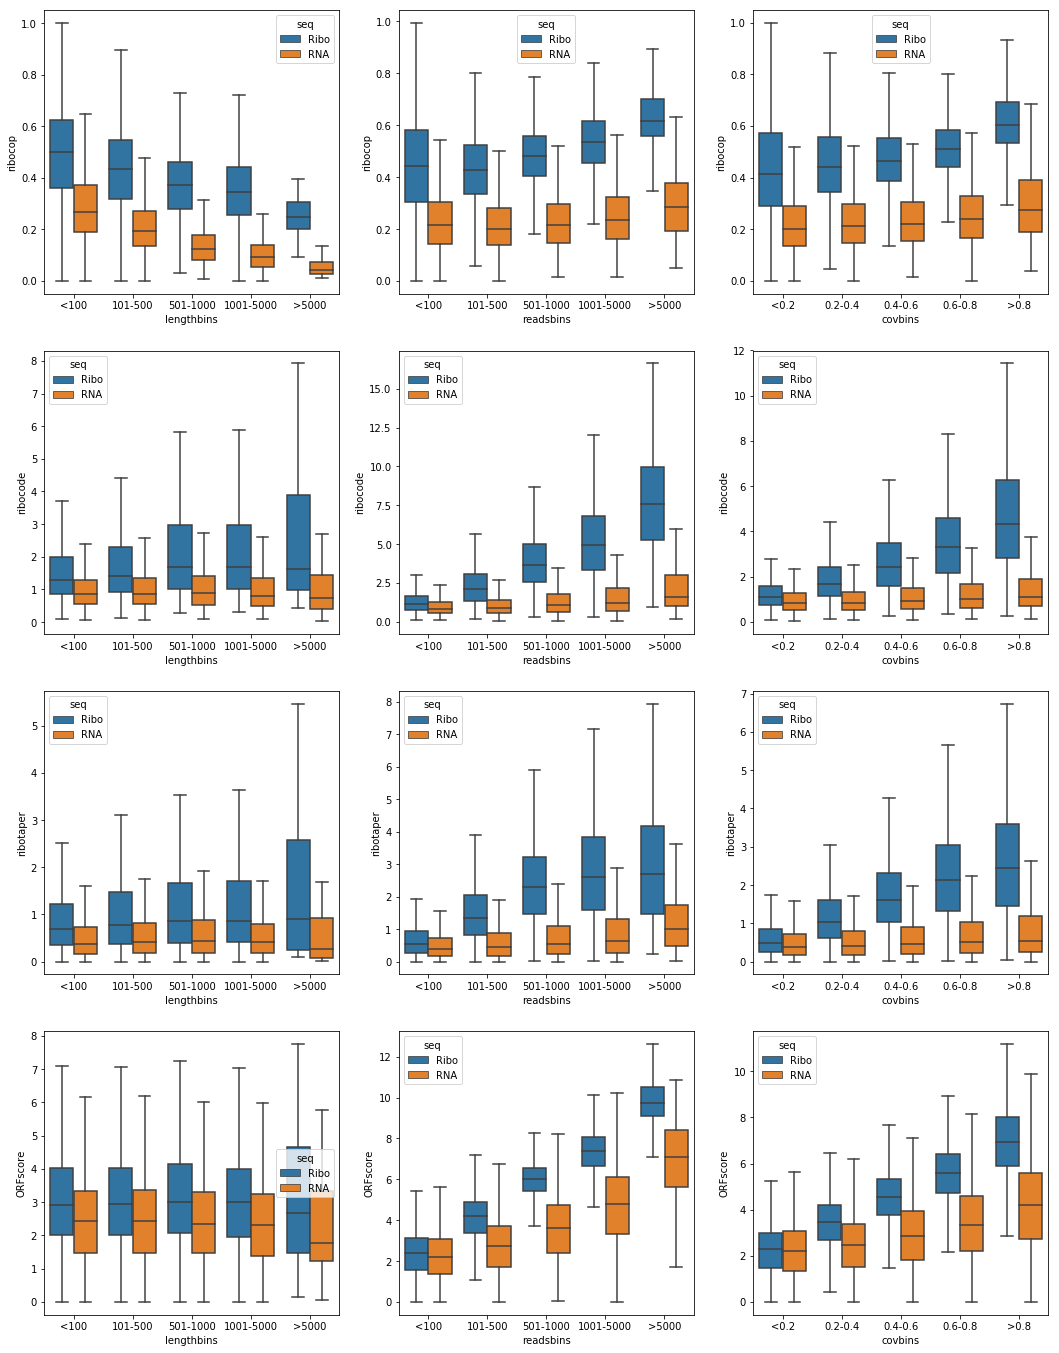

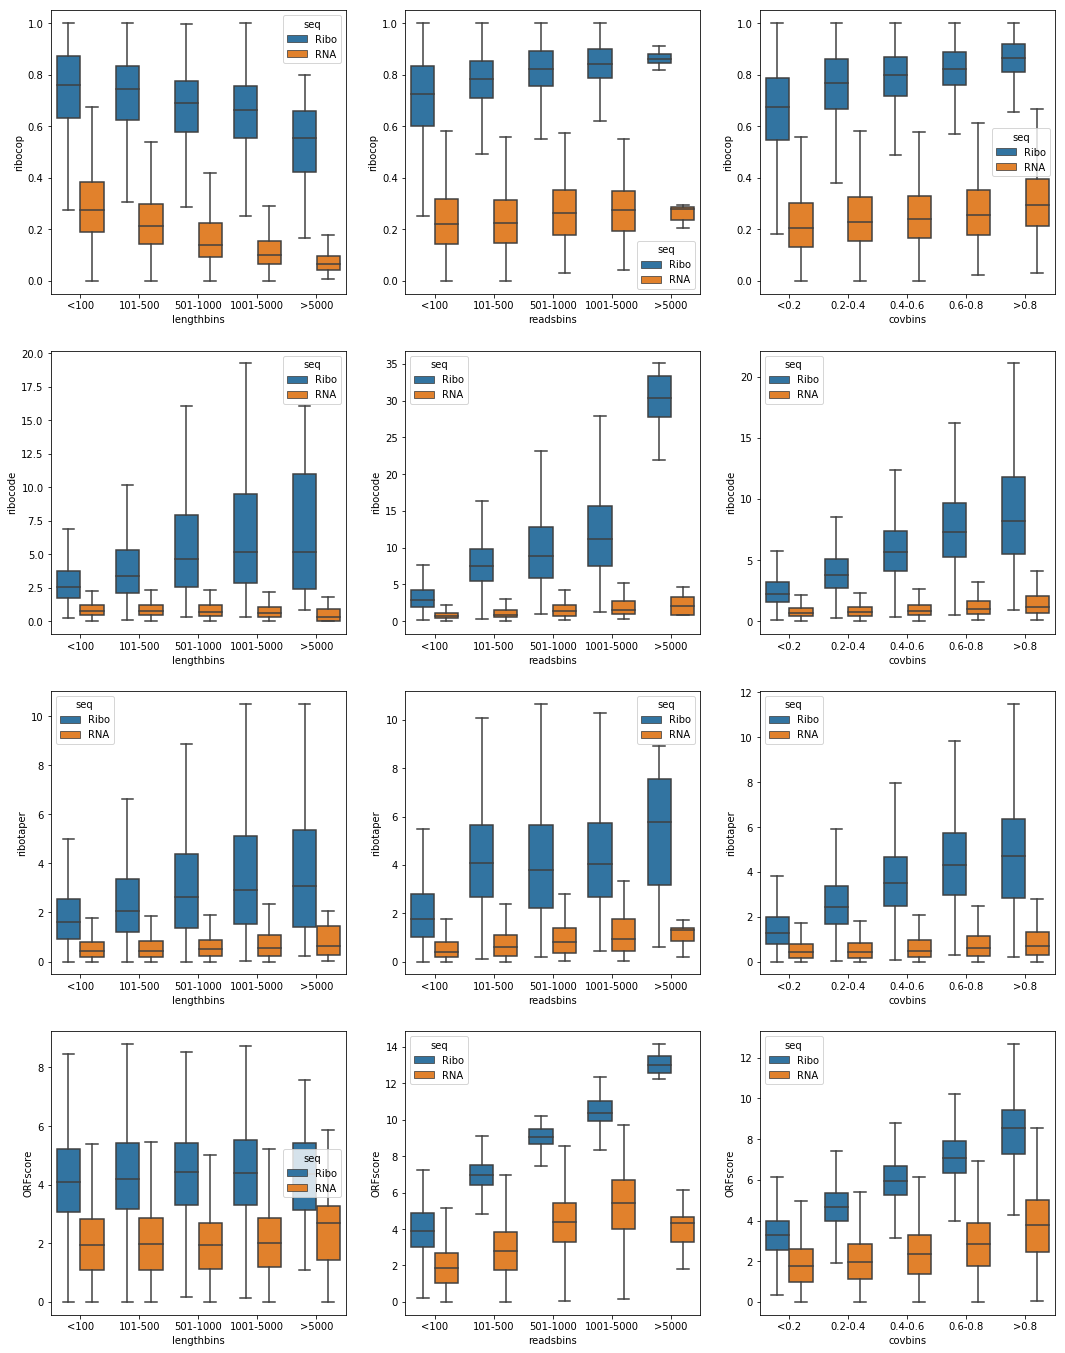

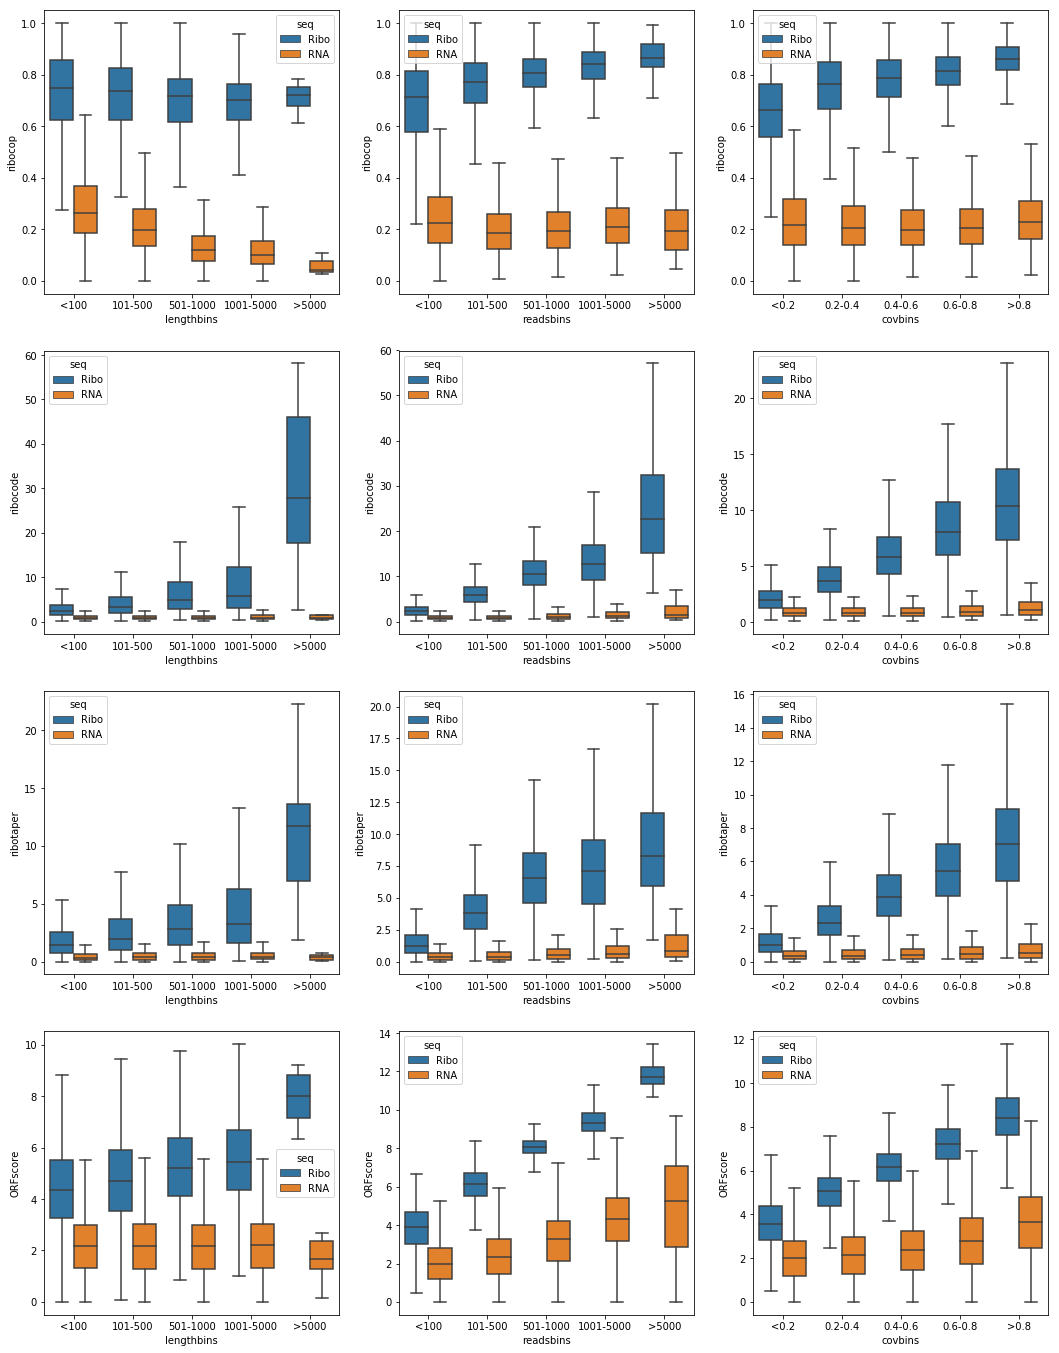

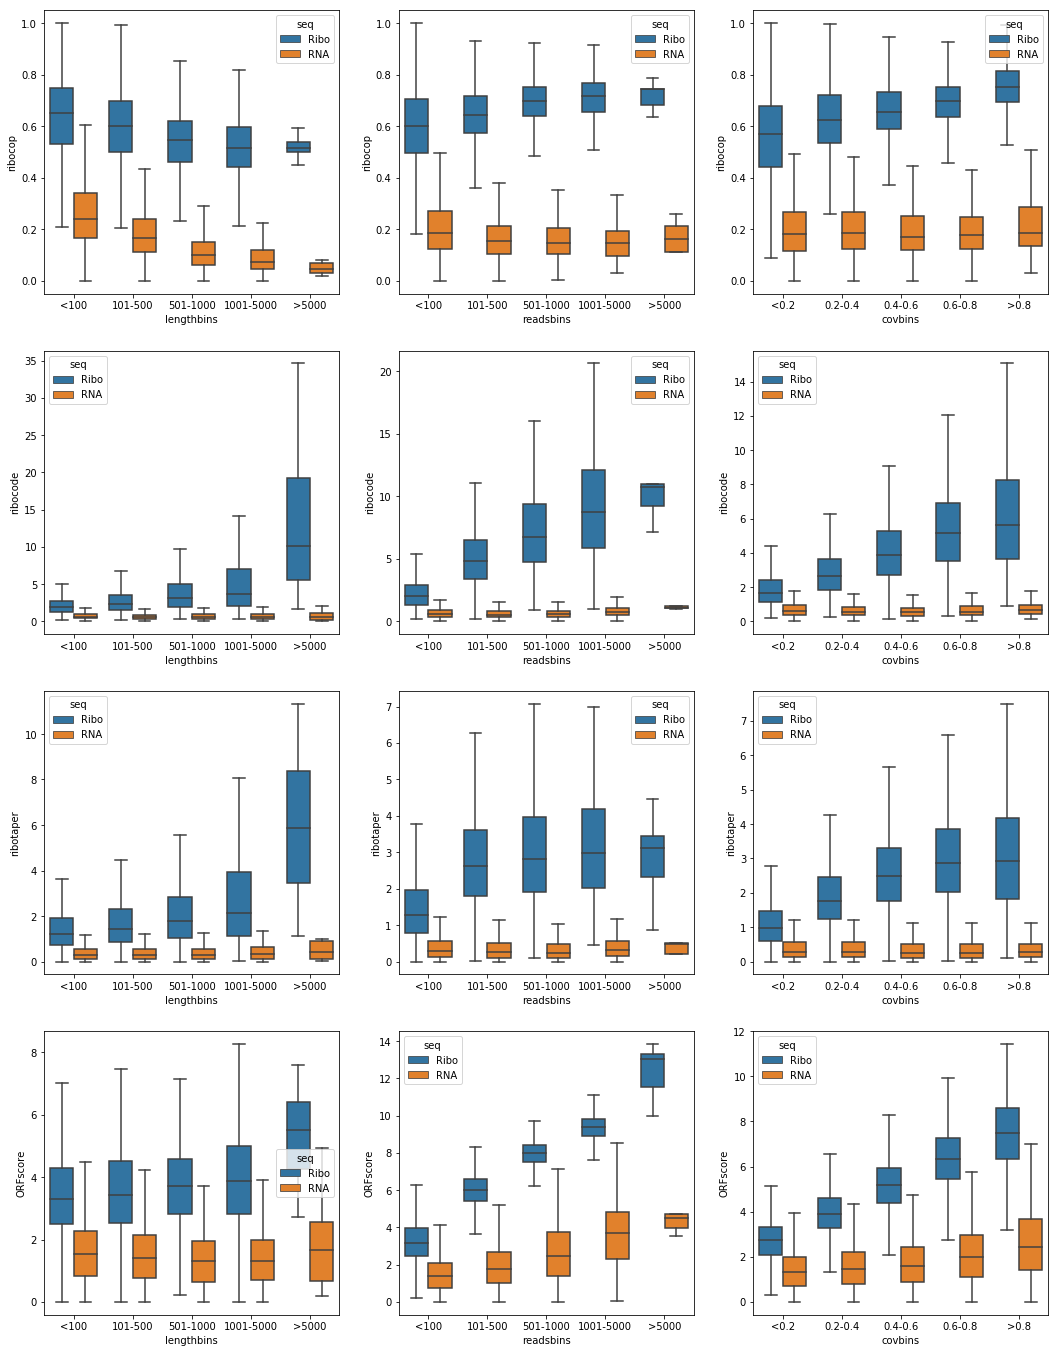

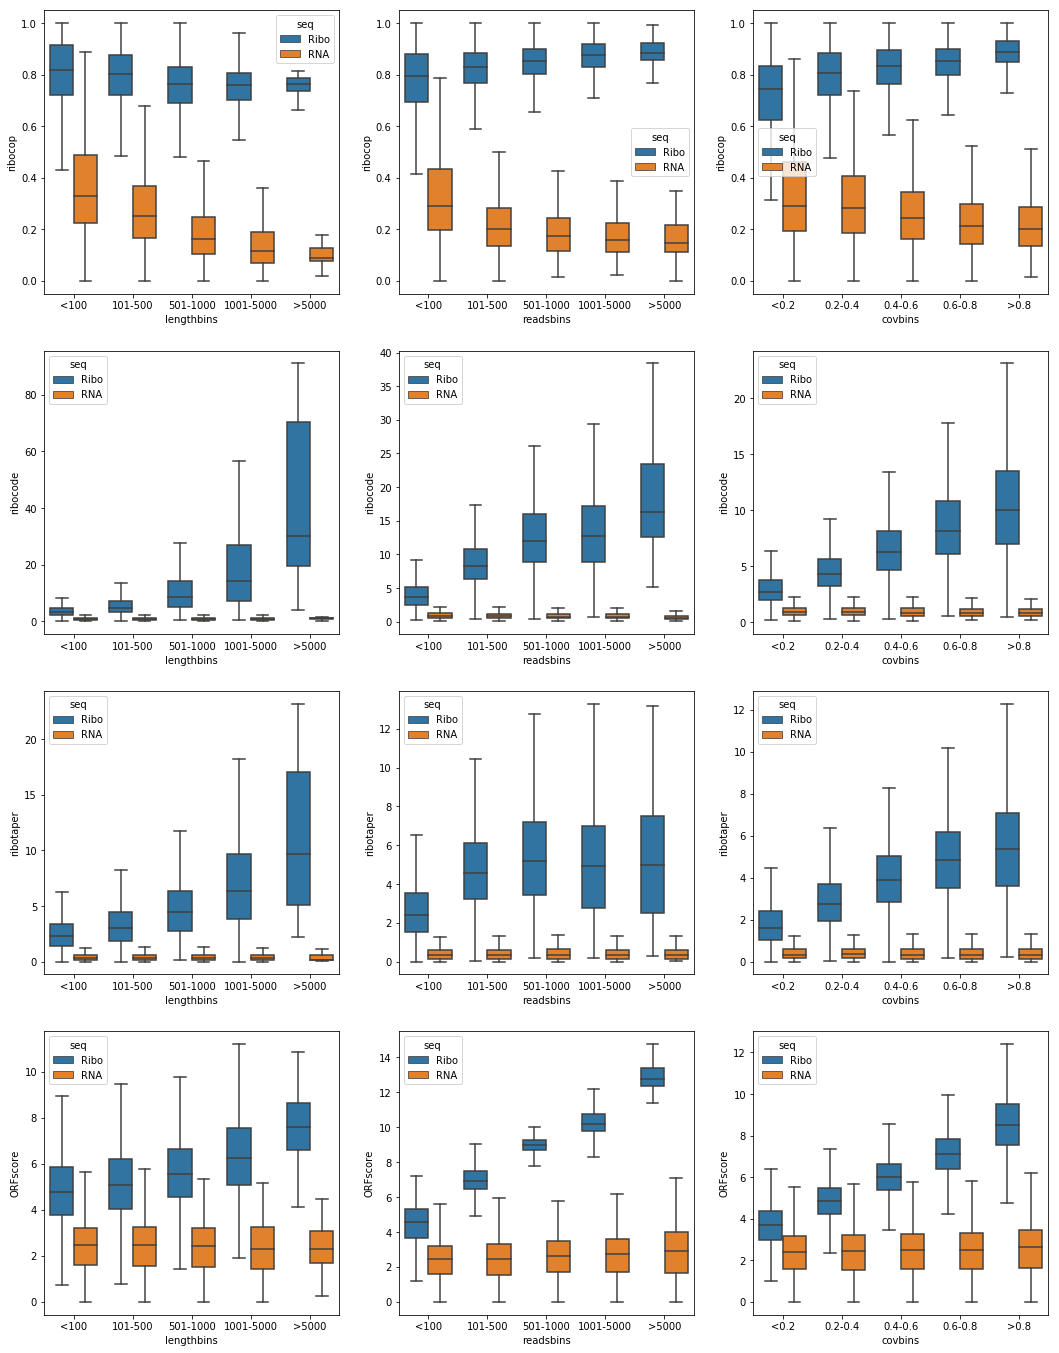

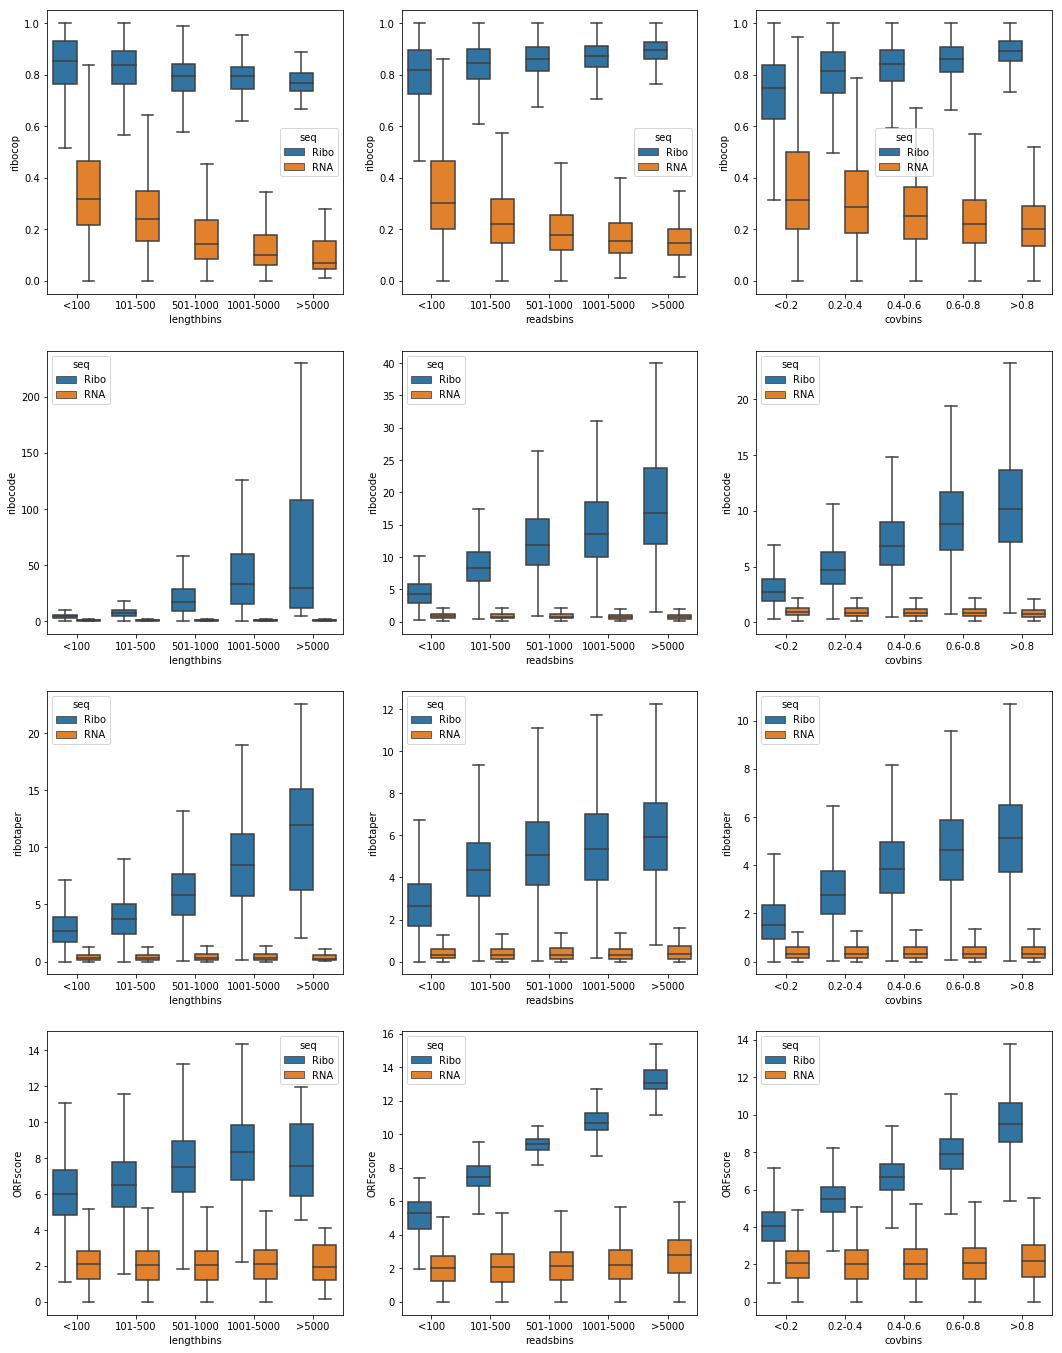

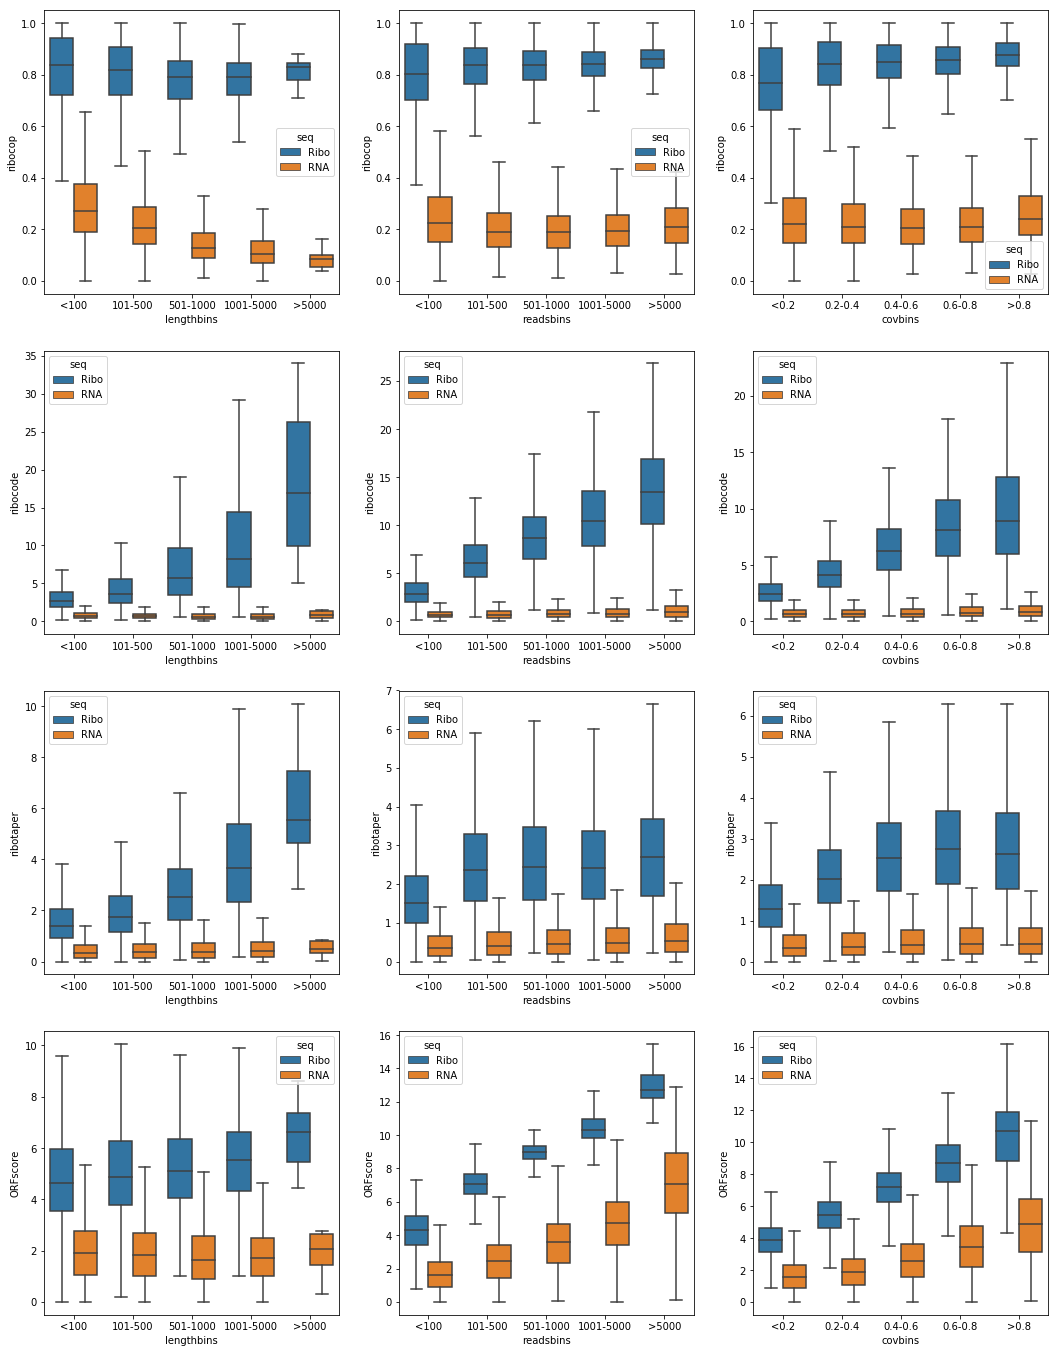

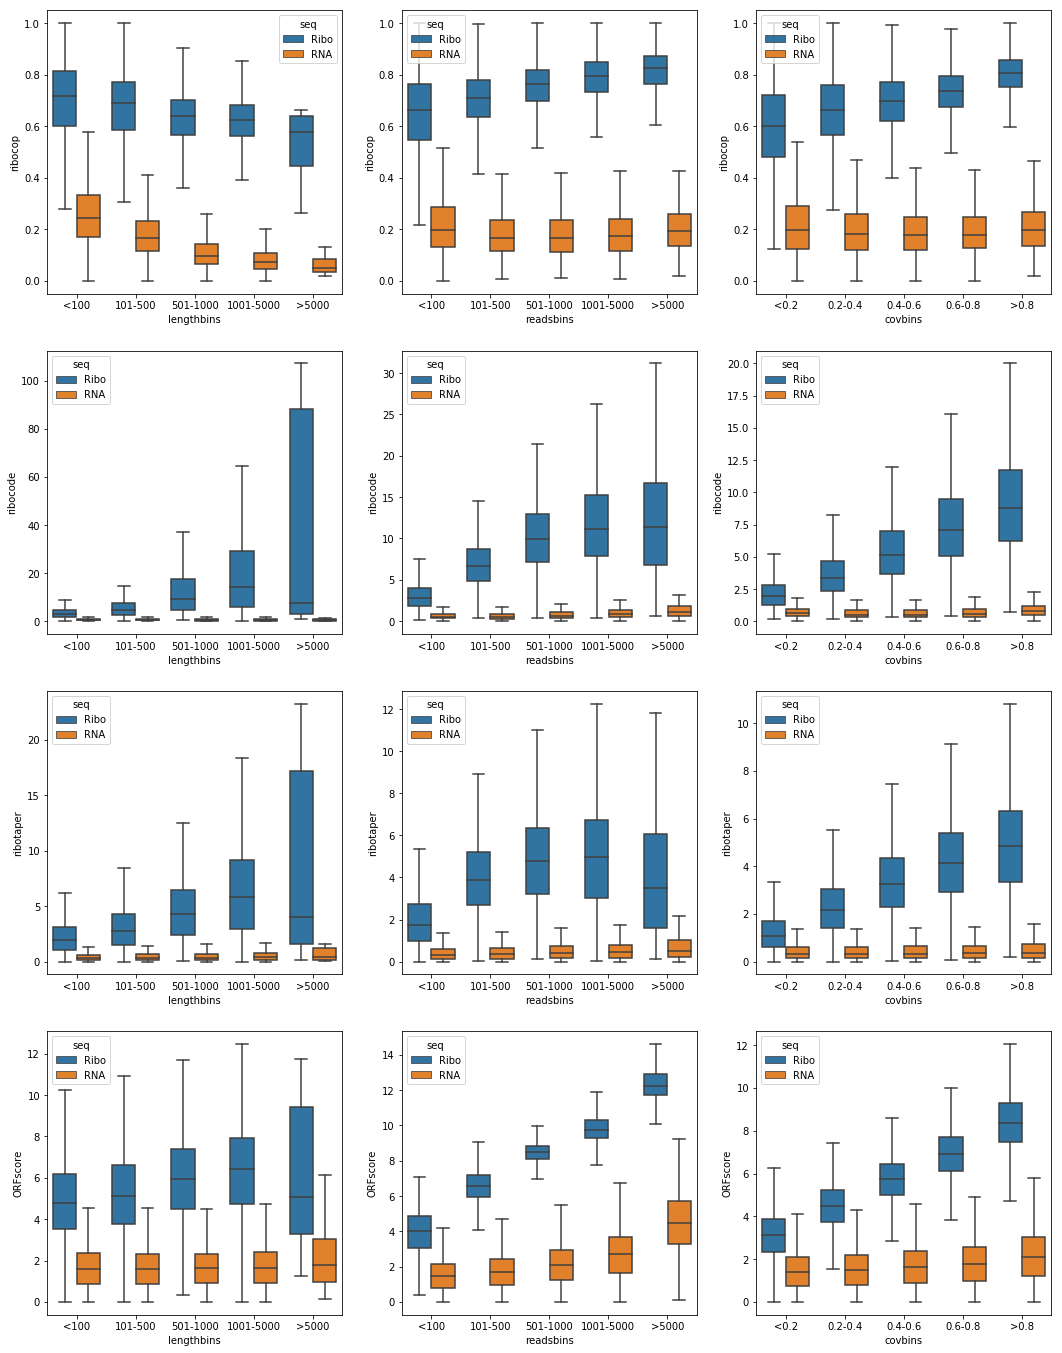

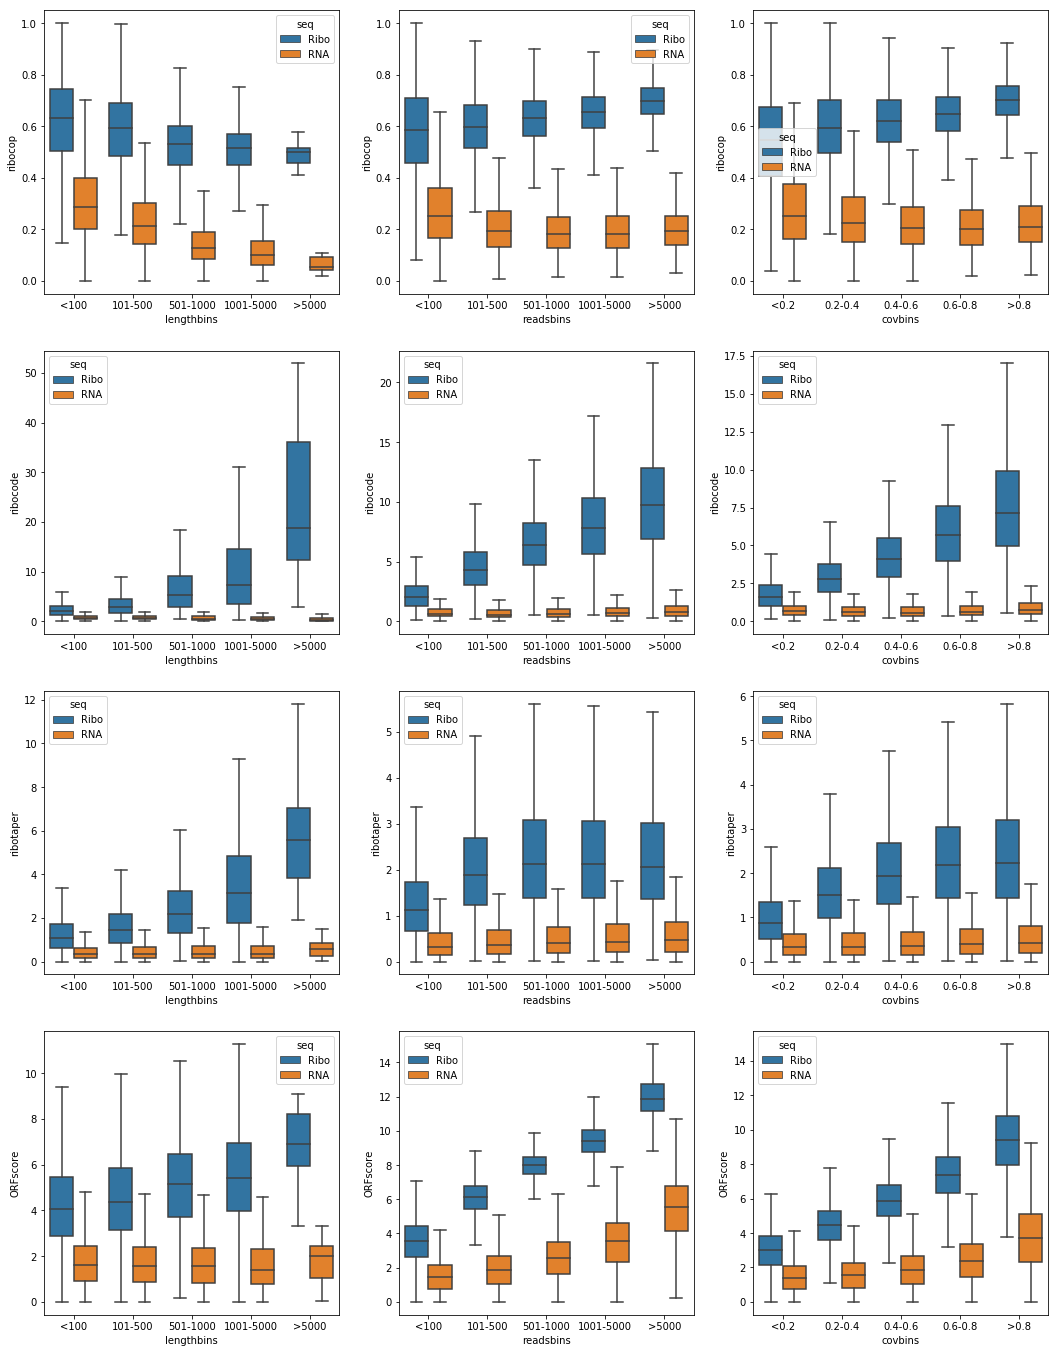

In [121]:
datasets = pd.read_table('/home/cmb-panasas2/wenzhenl/benchmark/scripts/gene_scripts/datasets.txt', header=None, sep=' ')
for _, row in datasets.iterrows():
    pro, ref = row
    print(pro, ref)
    fig, axes = plt.subplots(4,3, sharex=False, sharey=False)
    fig.set_size_inches(18, 24)
    df = pd.read_csv('/home/cmb-panasas2/wenzhenl/benchmark/exon_level/{}/{}/ROC_input.txt'.format(ref, pro),
                     sep='\t', dtype={'ribocode': np.double, 'ribocop': np.double, 'ribocop': np.double, 'ORFscore': np.double})
    df['name'] = df['name'].str.replace('_ribo', '').str.replace('_rna', '')
    df.set_index(['name', 'truth'], inplace=True)
    result_ccds = pd.read_csv('/home/cmb-panasas2/wenzhenl/benchmark/exon_level/{}/{}/results_ccds'.format(ref, pro), 
                              sep='\t', index_col='exon_id')
    code_df = pd.read_csv('/home/cmb-panasas2/wenzhenl/benchmark/exon_level/{}/{}/ribocode_result.txt'.format(ref, pro), sep='\t', index_col='ID')
    df['length'] = result_ccds.loc[df.index.get_level_values('name')]['length.x'].values
    df['reads'] = result_ccds.loc[df.index.get_level_values('name')]['reads_ribo'].values
    df['coverage'] = code_df.loc[df.index.get_level_values('name')]['ribo_cov'].values
    df['ribocode'] = -np.log10(df['ribocode'])
    df['ribotaper'] = -np.log10(df['ribotaper'])
    df['seq'] = ''
    df.loc[df.index.get_level_values('truth') == 1, 'seq'] = 'Ribo'
    df.loc[df.index.get_level_values('truth') == 0, 'seq'] = 'RNA'
    df['lengthbins'] = ''
    df.loc[df['length'] <100, 'lengthbins'] = '<100'
    df.loc[(df['length'] >= 100) & (df['length'] < 500), 'lengthbins'] = '101-500'
    df.loc[(df['length'] >= 500) & (df['length'] < 1000), 'lengthbins'] = '501-1000'
    df.loc[(df['length'] >= 1000) & (df['length'] < 5000), 'lengthbins']= '1001-5000'
    df.loc[df['length'] > 5000, 'lengthbins'] = '>5000'
    df['readsbins'] = ''
    df.loc[df['reads'] <100, 'readsbins'] = '<100'
    df.loc[(df['reads'] >= 100) & (df['reads'] < 500), 'readsbins'] = '101-500'
    df.loc[(df['reads'] >= 500) & (df['reads'] < 1000), 'readsbins'] = '501-1000'
    df.loc[(df['reads'] >= 1000) & (df['reads'] < 5000), 'readsbins']= '1001-5000'
    df.loc[df['reads'] > 5000, 'readsbins'] = '>5000'
    df['covbins'] = ''
    df.loc[df['coverage'] <0.2, 'covbins'] = '<0.2'
    df.loc[(df['coverage'] >= 0.2) & (df['coverage'] < 0.4), 'covbins'] = '0.2-0.4'
    df.loc[(df['coverage'] >= 0.4) & (df['coverage'] < 0.6), 'covbins'] = '0.4-0.6'
    df.loc[(df['coverage'] >= 0.6) & (df['coverage'] < 0.8), 'covbins']= '0.6-0.8'
    df.loc[df['coverage'] > 0.8, 'covbins'] = '>0.8'
    bins = {'lengthbins': 'length', 'readsbins': 'reads', 'covbins': 'coverage'}
    for i, tool in enumerate(['ribocop', 'ribocode', 'ribotaper', 'ORFscore']):
        for j, totest in enumerate(['lengthbins', 'readsbins', 'covbins']):
            if totest == 'covbins':
                sns.boxplot(x=totest, y=tool, hue='seq', data=df, 
                            order=['<0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '>0.8'],
                            showfliers=False, ax=axes[i][j])
            else:
                sns.boxplot(x=totest, y=tool, hue='seq', data=df, 
                            order=['<100', '101-500', '501-1000', '1001-5000', '>5000'],
                            showfliers=False, ax=axes[i][j])
    fig.savefig('results/{}_bins_dist.pdf'.format(pro))
                          

In [59]:
df1 = pd.DataFrame({'a': [1,2,3], 'b': [7,8,9], 'c':['id1', 'id2', 'id3']})
df2 = pd.DataFrame({'a': [1,2,3,4,5,6], 'b': [7,8,9,10,11,12], 
                    'c': ['id1', 'id2', 'id3','id1', 'id2', 'id3_h2']})



In [111]:
df['readsbins']

(chr1_100011364_100011533_CCDS_ENSG00000117620.13, 1)         <100
(chr1_100011364_100011533_CCDS_ENSG00000117620.13, 0)         <100
(chr1_100080495_100080659_CCDS_ENSG00000156875.13, 1)         <100
(chr1_100080495_100080659_CCDS_ENSG00000156875.13, 0)         <100
(chr1_100082002_100082206_CCDS_ENSG00000156875.13, 1)         <100
(chr1_100082002_100082206_CCDS_ENSG00000156875.13, 0)         <100
(chr1_100107809_100108004_CCDS_ENSG00000156876.9, 1)          <100
(chr1_100107809_100108004_CCDS_ENSG00000156876.9, 0)          <100
(chr1_100147893_100148326_CCDS_ENSG00000122435.9, 1)          <100
(chr1_100147893_100148326_CCDS_ENSG00000122435.9, 0)          <100
(chr1_100215982_100216199_CCDS_ENSG00000137992.14, 1)         <100
(chr1_100215982_100216199_CCDS_ENSG00000137992.14, 0)         <100
(chr1_100230732_100230914_CCDS_ENSG00000137992.14, 1)         <100
(chr1_100230732_100230914_CCDS_ENSG00000137992.14, 0)         <100
(chr1_100249769_100249820_CCDS_ENSG00000137992.14, 1)         

In [102]:
sns.boxplot(x='lengthbins', y='ribocop', hue='seq', data=df)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [70]:
result_ccds = pd.read_csv('/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP098789_human/results_ccds', sep='\t', index_col='exon_id')

In [60]:
df2.merge(df1, left_on='c', right_on='c')

,a_x,b_x,c,a_y,b_y
0,1,7,id1,1,7
1,4,10,id1,1,7
2,2,8,id2,2,8
3,5,11,id2,2,8
4,3,9,id3,3,9


In [61]:
df = pd.read_csv('/home/cmb-panasas2/wenzhenl/benchmark/exon_level/hg38/SRP098789_human//ROC_input.txt', sep='\t')

In [67]:
df['name'] = df['name'].str.replace('_ribo', '').str.replace('_rna', '')

In [73]:
print(df.loc[0, 'name'])

chr1_100007033_100007156_CCDS_ENSG00000117620.13


In [75]:
df.set_index('name', 'truth', inplace=True)

In [77]:
df['length', 'ribo_reads'] = result_ccds.loc[df.index.get_level_values('name')]['length.x'].values

In [84]:
(df['length'] >= 100) & (df['length'] < 500)

name
chr1_100007033_100007156_CCDS_ENSG00000117620.13         True
chr1_100007033_100007156_CCDS_ENSG00000117620.13         True
chr1_100015301_100015420_CCDS_ENSG00000117620.13         True
chr1_100015301_100015420_CCDS_ENSG00000117620.13         True
chr1_100017681_100017815_CCDS_ENSG00000117620.13         True
chr1_100017681_100017815_CCDS_ENSG00000117620.13         True
chr1_100022385_100022473_CCDS_ENSG00000117620.13        False
chr1_100022385_100022473_CCDS_ENSG00000117620.13        False
chr1_100059877_100060005_CCDS_ENSG00000156875.13         True
chr1_100059877_100060005_CCDS_ENSG00000156875.13         True
chr1_100067976_100068195_CCDS_ENSG00000156875.13         True
chr1_100067976_100068195_CCDS_ENSG00000156875.13         True
chr1_100080495_100080659_CCDS_ENSG00000156875.13         True
chr1_100080495_100080659_CCDS_ENSG00000156875.13         True
chr1_100082002_100082206_CCDS_ENSG00000156875.13         True
chr1_100082002_100082206_CCDS_ENSG00000156875.13         True
chr

In [98]:
df.loc[df.index.get_level_values('truth') == 1]['seq'] = 'Ribo'

/panfs/cmb-panasas2/wenzhenl/downloads/miniconda/envs/ribo/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
df.index.get_level_values('truth') == 1

array([ True, False,  True, ..., False,  True, False], dtype=bool)

In [97]:
df

ribotaper     chisq  \
name                                               truth                        
chr1_100011364_100011533_CCDS_ENSG00000117620.13   1       0.619402  0.259259   
                                                   0       0.143946  0.633090   
chr1_100080495_100080659_CCDS_ENSG00000156875.13   1       2.019773  0.053498   
                                                   0       0.281393  0.497523   
chr1_100082002_100082206_CCDS_ENSG00000156875.13   1       0.334160  0.000390   
                                                   0       1.213670  0.067024   
chr1_100107809_100108004_CCDS_ENSG00000156876.9    1       0.811456  0.110197   
                                                   0       0.066756  1.000000   
chr1_100147893_100148326_CCDS_ENSG00000122435.9    1       1.155662  0.020576   
                                                   0       0.267077  0.227011   
chr1_100215982_100216199_CCDS_ENSG00000137992.14   1       2.051090  0.020576   
                                                   0       0.211052  0.501485   
chr1_100230732_100230914_CCDS_ENSG00000137992.14   1       2.050263  0.000390   
                                                   0       0.914594  0.011441   
chr1_100249769_100249820_CCDS_ENSG00000137992.14   1       0.459758  0.176955   
                                                   0       0.991413  0.135802   
chr1_100268151_100268295_CCDS_ENSG00000137996.12   1       2.388876  0.000172   
                                                   0       0.489806  0.195119   
chr1_100285227_100285322_CCDS_ENSG00000137996.12   1       0.745002  0.295839   
                                                   0       0.000451  0.977013   
chr1_100291402_100291501_CCDS_ENSG00000137996.12   1       1.176930  0.295839   
                                                   0       0.413200  0.392671   
chr1_100873944_100874430_CCDS_ENSG00000162694.13   1       0.492197  0.413199   
                                                   0       0.465027  0.282322   
chr1_100877475_100877903_CCDS_ENSG00000162694.13   1       1.114835  0.053295   
                                                   0       0.704562  0.196912   
chr1_100896262_100896342_CCDS_ENSG00000162695.11   1       0.692913  0.110197   
                                                   0       0.441303  0.382716   
chr1_10095460_10095596_CCDS_ENSG00000130939.18     1       1.850946  0.053498   
                                                   0       1.304384  0.080824   
...                                                             ...       ...   
chrY_1593462_1594224_CCDS_ENSG00000197976.11-PAR-Y 1       1.124330  0.002896   
                                                   0       0.648717  0.016390   
chrY_20582589_20582693_CCDS_ENSG00000198692.9      1       0.649456  0.088858   
                                                   0       0.329260  0.178479   
chrY_2266739_2266947_CCDS_ENSG00000169084.13-PAR-Y 1       0.436667  0.176955   
                                                   0       0.492062  0.113203   
chrY_2425196_2425304_CCDS_ENSG00000169084.13-PAR-Y 1       0.660083  0.295839   
                                                   0       0.224674  0.367879   
chrY_2488637_2490719_CCDS_ENSG00000214717.10-PAR-Y 1       0.596560  0.647920   
                                                   0       0.571010  0.167950   
chrY_2714421_2714454_CCDS_ENSG00000002586.18-PAR-Y 1       0.963222  0.003329   
                                                   0       0.002785  1.000000   
chrY_2719660_2719705_CCDS_ENSG00000002586.18-PAR-Y 1       1.483042  0.001426   
                                                   0       0.495343  0.233506   
chrY_2722626_2722674_CCDS_ENSG00000002586.18-PAR-Y 1       1.709401  0.000006   
                                                   0       0.947597  0.074274   
chrY_2723313_2723364_CCDS_ENSG00000002586.18-PAR-Y 1       1.779598  0.000132   
        